In [1]:
import numpy as np
import math
import scipy
import pyDOE
import matplotlib as mpl
import matplotlib.pyplot as plt
from tempfile import TemporaryFile

8개씩 * 

$$f(x,y)=A \sin(Bx)\sin(Cy)$$

위 식에서 A, B, C는 다른 Task를 표현할 수 있는 Constant 값이다.


|A|B|C|$f(x,y)$|
|--|--|--|--|
|3|1|1||
|1|3|1||
|1|1|3||
|2|2|1||
|2|1|2||
|1|2|2||

위의 조건들로 f(x,y)를 표현하는 전체 Field를 생성한뒤 다른 Task에 대해서 얼마나 Error를 보이는지 확인한다.

이 과정에서 각 Field에서 데이터를 샘플링할때, Latin HyperCube Sampling을 통해서 추출한다.

추가로 f(x,y)를 구하는데 약간의 노이즈를 추가한다.(WIP.. 노이즈 추가 방법에 대해 고민)

<!-- $$f(x,y)=A \sin(Bx)\sin(Cy)$$ -->

In [2]:
def func1(x,y,a=1,b=1,c=1):
    return a*np.sin(b*x)*np.sin(c*y)

In [3]:
sample_data = pyDOE.lhs(2, samples=3000)
sample_data -= 0.5
sample_data *= 2 * np.pi
print("sample_data.shape :",sample_data.shape)

sample_data.shape : (3000, 2)


$[-\pi, \pi]$ 범위사이 1500개의 (x,y) 데이터 생성

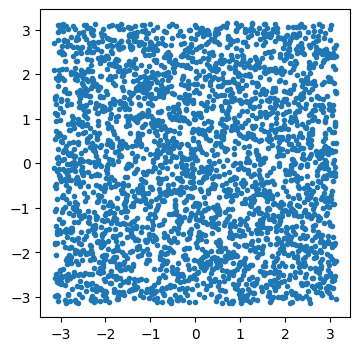

In [4]:
plt.figure(figsize=(4,4))
plt.scatter(x=sample_data.T[0], y=sample_data.T[1],marker=".")
plt.show()

$$f(x,y)=3\cdot \sin(1\cdot x)\sin(1\cdot y)$$

In [11]:
result = np.array([func1(i[0],i[1],a=1,b=2,c=2) for i in sample_data])
result

array([ 0.60984651, -0.18157712, -0.78970522, ..., -0.61918116,
       -0.12338281, -0.49626216])

In [12]:
data_2_2_1 = np.concatenate([sample_data, result[:,None]], axis=1)
print(data_2_2_1.shape)

(3000, 3)


In [13]:
with open('./data/testdata_1_2_2.npy', 'wb') as f:
    np.save(f, data_2_2_1)

$$f(x,y)=1 \cdot \sin(3\cdot x)\sin(1\cdot y)$$

In [8]:
sample_data = pyDOE.lhs(2, samples=1500)
sample_data -= 0.5
sample_data *= 2 * np.pi
result = np.array([func1(i[0],i[1],b=3) for i in sample_data])
data_1_3_1 = np.concatenate([sample_data, result[:,None]], axis=1)
with open('./data/testdata_1_3_1.npy', 'wb') as f:
    np.save(f, data_1_3_1)

$$f(x,y)=1 \cdot \sin(1\cdot x)\sin(3\cdot y)$$

In [9]:
sample_data = pyDOE.lhs(2, samples=3000)
sample_data -= 0.5
sample_data *= 2 * np.pi
result = np.array([func1(i[0],i[1],c=3) for i in sample_data])
data_1_1_3 = np.concatenate([sample_data, result[:,None]], axis=1)
with open('./data/testdata_1_1_3.npy', 'wb') as f:
    np.save(f, data_1_1_3)

In [10]:
data_1_1_3.shape

(3000, 3)

$$f(x,y)=1 \cdot \sin(1\cdot x)\sin(1\cdot y)$$

In [11]:
sample_data = pyDOE.lhs(2, samples=3000)
sample_data -= 0.5
sample_data *= 2 * np.pi
result = np.array([func1(i[0],i[1],c=1) for i in sample_data])
data_1_1_1 = np.concatenate([sample_data, result[:,None]], axis=1)
with open('./data/testdata_1_1_1.npy', 'wb') as f:
    np.save(f, data_1_1_1)

In [12]:
data_1_1_1.shape

(3000, 3)

## Visualization

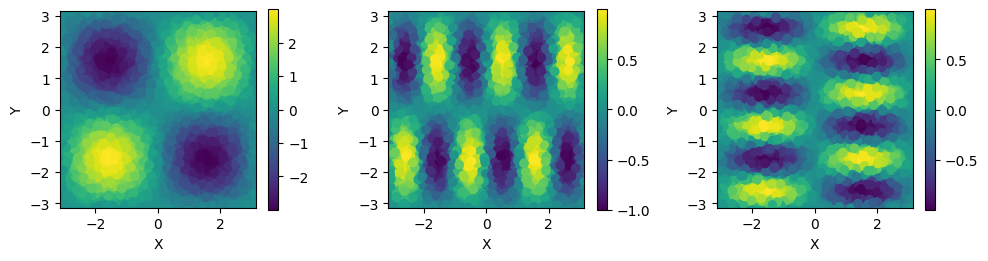

In [10]:
# 그리드 생성
datapath_list = ["data_3_1_1","data_1_3_1","data_1_1_3"]
# figure
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
for idx, i in enumerate(datapath_list):
    with open(f'./data/{i}.npy', 'rb') as f:
        data = np.load(f,allow_pickle=True)

    x = data.T[0]
    y = data.T[1]
    f = data.T[2]
    xi, yi = np.mgrid[x.min():x.max():500j, y.min():y.max():500j]

    # Rbf interpolation
    rbf = scipy.interpolate.Rbf(x, y, f)
    org = rbf(xi, yi)


    img = ax[idx].imshow(org.T, origin='lower',extent=[x.min(), x.max(), y.min(), y.max()])
    ax[idx].scatter(x, y, c=f)

    ax[idx].set(xlabel='X', ylabel='Y')
    fig.colorbar(img,shrink=0.8)
plt.tight_layout()

data_3_1_1
data_1_3_1
data_1_1_3


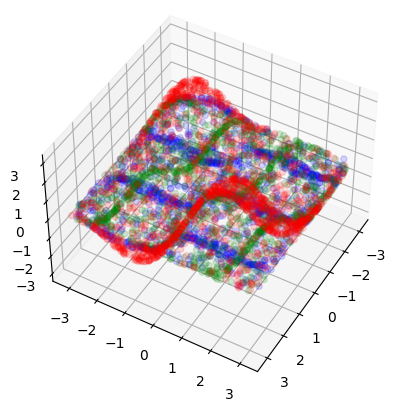

In [68]:
# Creating figure
color_list = ["red", "blue", "green"]
# Creating plot
fig = plt.figure()
wf = fig.add_subplot(111, projection='3d')
for idx, [i, c] in enumerate(zip(datapath_list,color_list)):
    with open(f'./data/{i}.npy', 'rb') as f:
        data = np.load(f,allow_pickle=True)
    print(i)
    f.close
    x = data.T[0]
    y = data.T[1]
    f = data.T[2]
    wf.scatter3D(x, y, f, color = c, alpha=0.15)
    
wf.view_init(45, 30)
plt.show()